<a href="https://colab.research.google.com/github/SriRamK345/ML_sample_DS/blob/main/LogR_sampleds1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


*Initial Analysis*

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [99]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [100]:
df[["pclass","class"]]

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third
...,...,...
886,2,Second
887,1,First
888,3,Third
889,1,First


In [101]:
# removing duplicate columns
df.drop(["class","alive","alone"],axis=1,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton


**Exploratory data analysis (EDA)**
#Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [102]:
null_cal = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_cal.append(x)

null_cal

[0, 0, 0, 177, 0, 0, 0, 2, 0, 0, 688, 2]

In [103]:
pd.DataFrame(null_cal,index=df.columns,columns=["Null Values"])

,Null Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
who,0
adult_male,0


In [104]:
df["deck"].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

<Axes: xlabel='deck', ylabel='count'>

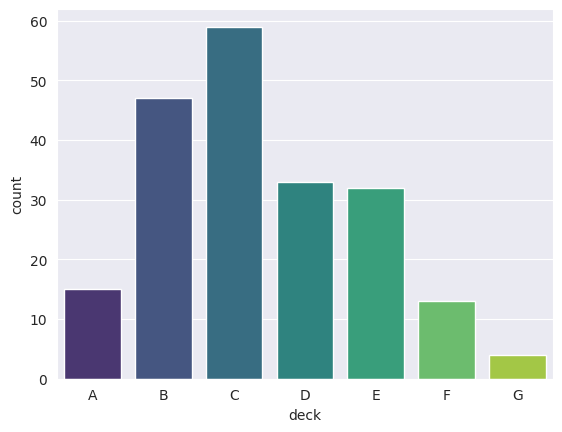

In [105]:
sns.set_style("darkgrid")
sns.countplot(x = "deck" ,data = df, palette="viridis")

<Axes: xlabel='deck', ylabel='count'>

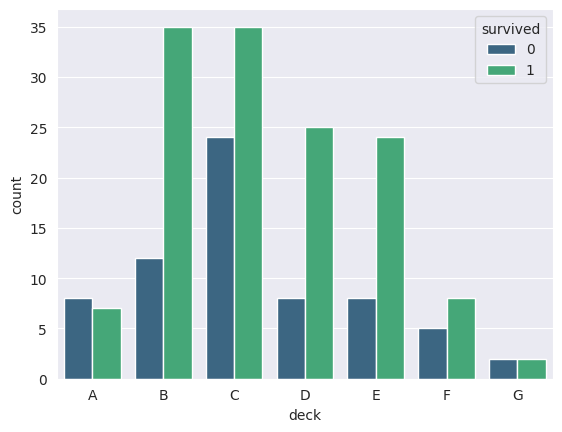

In [106]:
sns.set_style("darkgrid")
sns.countplot(x = "deck" ,data = df,hue="survived", palette="viridis") # comparing with target column

In [107]:
df.drop("deck",axis=1,inplace=True)

In [108]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton


<Axes: xlabel='pclass', ylabel='age'>

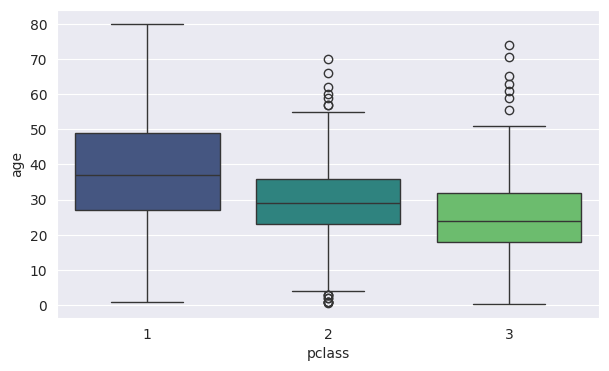

In [109]:
# comparing age with pclass
plt.figure(figsize=(7,4))
sns.boxplot(x="pclass",y="age",data=df,palette="viridis")

In [110]:
# # replacing null values
# df["age"].fillna(df.groupby("pclass")["age"].transform("mean"),inplace=True)
# df.info()

In [111]:
# we are replacing null values with mean of the pclass 1,2,3
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [112]:
df["age"] = df[["age","pclass"]].apply(age_approx,axis=1)

In [113]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
who            0
adult_male     0
embark_town    2
dtype: int64

In [114]:
df.dropna(inplace=True)

In [117]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton


In [127]:
# #plt.figure(figsize=(10,6))
# #sns.heatmap(df.corr(),annot=True,cmap="viridis")

# ValueError                                Traceback (most recent call last)
# <ipython-input-119-ad5131772714> in <cell line: 2>()
#       1 plt.figure(figsize=(10,6))
# ----> 2 sns.heatmap(df.corr(),annot=True,cmap="viridis")

# 3 frames
# /usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py in _interleave(self, dtype, na_value)
#    1792             else:
#    1793                 arr = blk.get_values(dtype)
# -> 1794             result[rl.indexer] = arr
#    1795             itemmask[rl.indexer] = 1
#    1796

# ValueError: could not convert string to float: 'male'
# <Figure size 1000x600 with 0 Axes>

In [124]:
 df["sex"].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [125]:
df["sex"].replace({"male":0,"female":1},inplace=True)

In [132]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

ValueError: could not convert string to float: 'man'

<Figure size 1000x600 with 0 Axes>

In [130]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [131]:
df["embarked"].replace({"S":0,"C":1,"Q":2},inplace=True)

In [133]:
df["who"].value_counts()

who
man      537
woman    269
child     83
Name: count, dtype: int64

In [134]:
df["who"].replace({"man":0,"woman":1,"child":2},inplace=True)

In [135]:
df["adult_male"].replace({True:1,False:0},inplace=True)

In [136]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [137]:
df["embark_town"].replace({"Southampton":0,"Cherbourg":1,"Queenstown":2},inplace=True)

<Axes: >

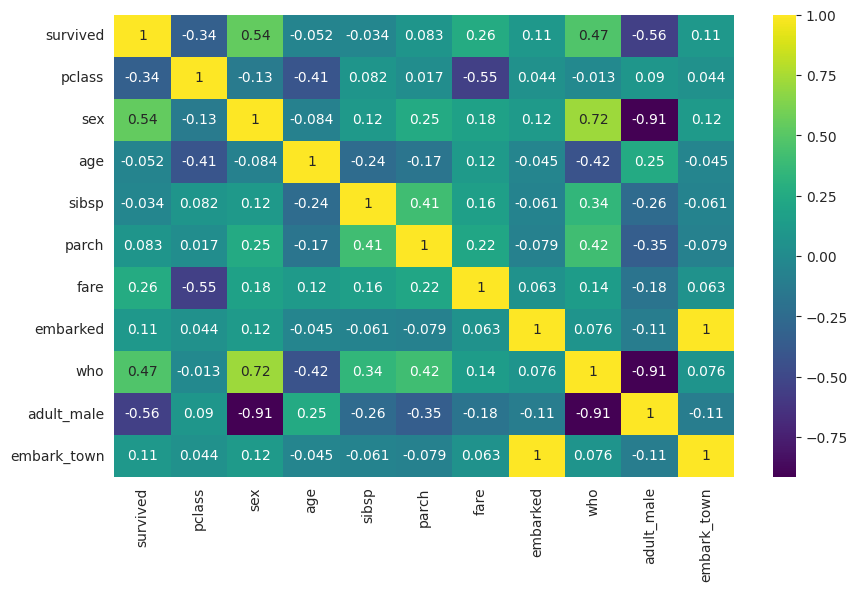

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")